## CRYPTO PRICE TRACKER
A crypto price tracker, is a real-time cryptocurrency tracker that fetches and visualizes the current prices and 24-hour price changes of the top 10 cryptocurrencies using public API data.

In [1]:
#Import needed libraries

#Data Handling
import pandas as pd

#For API requests
import requests

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

__Set Up the CoinGecko API Call__

In [6]:
# Base URL for CoinGecko Market Data API
url = "https://api.coingecko.com/api/v3/coins/markets"

In [8]:
# Set parameters to get top 10 coins in USD
params = {
    "vs_currency": "usd",              # Get prices in USD
    "order": "market_cap_desc",        # Sort by highest market cap (top coins)
    "per_page": 10,                    # Get only 10 coins
    "page": 1,                         # First page of results
    "sparkline": False                 # Don’t include sparkline (mini graph data)
}

In [18]:
# Make the API request
response = requests.get(url, params=params)

In [20]:
# Parse JSON response
data = response.json()

In [22]:
# Convert JSON to DataFrame
df = pd.DataFrame(data)

In [24]:
# Preview the data
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,116722.00,2323705899508,1,2323707650726,34032343335,117596.00,...,1.990364e+07,2.100000e+07,122838.00,-5.07505,2025-07-14T07:56:01.937Z,67.810000,1.718593e+05,2013-07-06T00:00:00.000Z,None,2025-08-08T13:33:42.751Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3910.16,472175977473,2,472175977473,29165855768,3952.68,...,1.207092e+08,NaN,4878.26,-20.02873,2021-11-10T14:24:19.604Z,0.432979,9.009156e+05,2015-10-20T00:00:00.000Z,"{'times': 43.78304729836662, 'currency': 'btc'...",2025-08-08T13:33:48.915Z
2,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,3.33,197331969494,3,332674889294,9592587047,3.37,...,9.998588e+10,1.000000e+11,3.65,-8.86547,2025-07-18T03:40:53.808Z,0.002686,1.236101e+05,2014-05-22T00:00:00.000Z,None,2025-08-08T13:33:39.762Z
3,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,164372487278,4,164372487278,83179372035,1.00,...,1.643420e+11,NaN,1.32,-24.40638,2018-07-24T00:00:00.000Z,0.572521,7.469676e+01,2015-03-02T00:00:00.000Z,None,2025-08-08T13:33:41.082Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,787.79,109677638402,5,109677638402,1214052051,790.34,...,1.392881e+08,2.000000e+08,858.34,-8.31147,2025-07-28T09:36:43.658Z,0.039818,1.976401e+06,2017-10-19T00:00:00.000Z,None,2025-08-08T13:33:42.453Z


__Cleaning and Formatting the Data__

In [35]:
# Keep only important columns
df = df[[
    "id",
    "symbol",
    "name",
    "current_price",
    "market_cap",
    "price_change_percentage_24h"
]]

In [37]:
# Rename columns for clarity
df.columns = [
    "ID", "Symbol", "Name", "Current Price (USD)",
    "Market Cap (USD)", "24h Change (%)"
]

In [39]:
# Show cleaned DataFrame
df.head()

,ID,Symbol,Name,Current Price (USD),Market Cap (USD),24h Change (%)
0,bitcoin,btc,Bitcoin,116722.00,2323705899508,0.28073
1,ethereum,eth,Ethereum,3910.16,472175977473,1.99585
2,ripple,xrp,XRP,3.33,197331969494,8.31845
3,tether,usdt,Tether,1.00,164372487278,0.01702
4,binancecoin,bnb,BNB,787.79,109677638402,1.52267


__Extracting Market Insights__

In [41]:
# Get top 3 cryptocurrencies by current price
top_by_price = df.sort_values(by="Current Price (USD)", ascending=False).head(3)

# Get top 3 gainers (highest % change in last 24h)
top_gainers = df.sort_values(by="24h Change (%)", ascending=False).head(3)

# Get top 3 losers (lowest % change in last 24h)
top_losers = df.sort_values(by="24h Change (%)", ascending=True).head(3)

# Display results
print("🔝 Top by Price:\n", top_by_price)
print("\n📈 Top Gainers:\n", top_gainers)
print("\n📉 Top Losers:\n", top_losers)

🔝 Top by Price:
              ID Symbol               Name  Current Price (USD)  \
0       bitcoin    btc            Bitcoin            116722.00   
1      ethereum    eth           Ethereum              3910.16   
7  staked-ether  steth  Lido Staked Ether              3905.93   

   Market Cap (USD)  24h Change (%)  
0     2323705899508         0.28073  
1      472175977473         1.99585  
7       34672540079         1.91743  

📈 Top Gainers:
          ID Symbol      Name  Current Price (USD)  Market Cap (USD)  \
2    ripple    xrp       XRP             3.330000      197331969494   
8  dogecoin   doge  Dogecoin             0.223087       33573911589   
5    solana    sol    Solana           176.410000       95149801582   

   24h Change (%)  
2         8.31845  
8         3.95282  
5         2.52118  

📉 Top Losers:
          ID Symbol    Name  Current Price (USD)  Market Cap (USD)  \
9      tron    trx    TRON             0.339051       32116293298   
6  usd-coin   usdc    USDC    

__Visualizing Price and Market Trends__

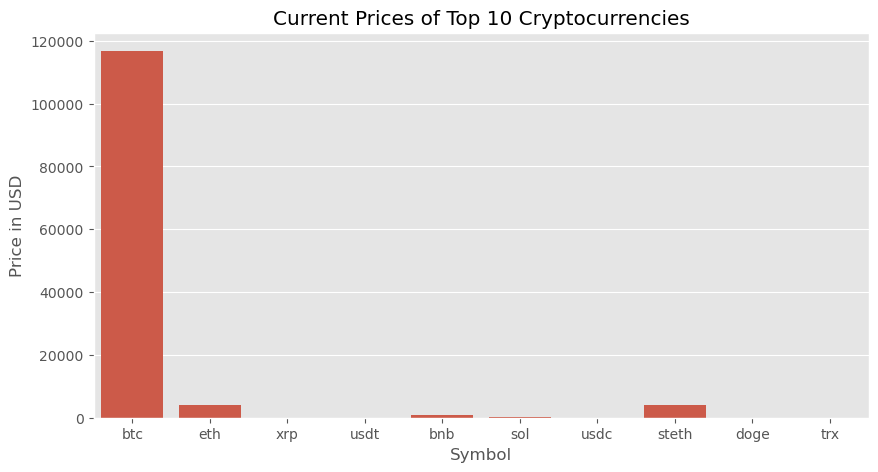

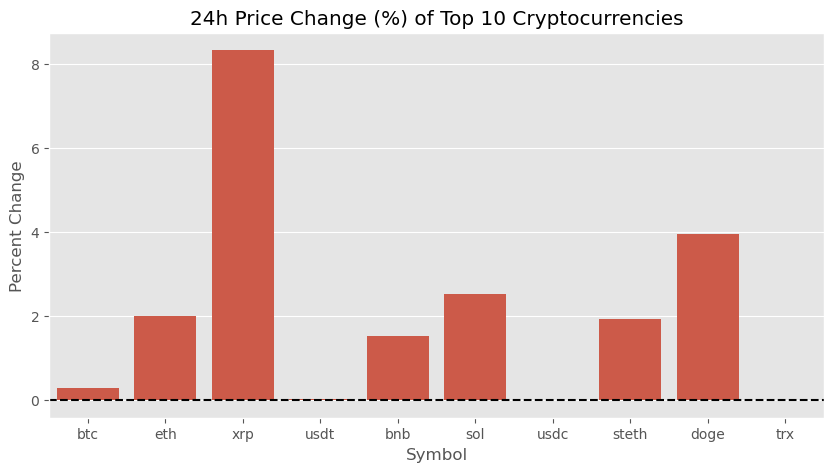

In [55]:
# Set plot style
plt.style.use('ggplot')

# Plot the current price of each crypto
plt.figure(figsize=(10, 5))
sns.barplot(x="Symbol", y="Current Price (USD)", data=df)
plt.title("Current Prices of Top 10 Cryptocurrencies")
plt.ylabel("Price in USD")
plt.show()

# Plot 24h price change percentage
plt.figure(figsize=(10, 5))
sns.barplot(x="Symbol", y="24h Change (%)", data=df)
plt.title("24h Price Change (%) of Top 10 Cryptocurrencies")
plt.ylabel("Percent Change")
plt.axhline(0, color='black', linestyle='--')  # horizontal line at 0%
plt.show()

## Project Summary
This project retrieves live cryptocurrency data, processes it using Pandas, and creates visual insights with Matplotlib. The bar charts highlight the USD prices of the top cryptocurrencies and their respective 24-hour percentage changes, enabling quick market trend assessment. The approach provides a foundation for further development into automated alerts, historical analysis, or trading decision-support tools.